In [1]:
!pip install pydicom

import glob, pylab, pandas as pd
import pydicom, numpy as np

     |████████████████████████████████| 7.1MB 8.5MB/s 


**Pneumonia Exploratory Data Analysis**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Analysing Stage_2_train-labels.csv

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_labels.csv')
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
patientId    30227 non-null object
x            9555 non-null float64
y            9555 non-null float64
width        9555 non-null float64
height       9555 non-null float64
Target       30227 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [0]:
df['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [0]:
df['Target'].isnull().sum()

0

In [0]:
print(df[df.duplicated(['patientId'])])

                                  patientId      x  ...  height  Target
5      00436515-870c-4b36-a041-de91049b9ab4  562.0  ...   453.0       1
9      00704310-78a8-4b38-8475-49f4573b2dbb  695.0  ...   137.0       1
15     00aecb01-a116-45a2-956c-08d2fa55433f  547.0  ...   165.0       1
17     00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  ...   284.0       1
20     00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  ...   476.0       1
...                                     ...    ...  ...     ...     ...
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  295.0  ...   176.0       1
30215  c1cddf32-b957-4753-acaa-472ab1447e86  766.0  ...   213.0       1
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  316.0  ...   273.0       1
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  ...   379.0       1
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  ...   356.0       1

[3543 rows x 6 columns]


In [0]:
df_group = df.groupby(by='patientId').size().reset_index(name='counts')

In [0]:
df_group.groupby('counts').agg('count')

,patientId
counts,
1,23286
2,3266
3,119
4,13


### The above shows that there are 3543 duplicate rows., so, patientID is repeating in the dataset.

In [0]:
df.iloc[0]

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 0, dtype: object

##### each row in the CSV file contains a patientId (one unique value per patient), a target (either 0 or 1 for absence or presence of pneumonia, respectively) and the corresponding abnormality bounding box defined by the upper-left hand corner (x, y) coordinate and its corresponding width and height.

#### In this particular case, the patient does not have pneumonia and so the corresponding bounding box information is set to NaN

In [0]:
print(df.iloc[4])

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
Name: 4, dtype: object


#### This instance shows the details of X and Y location of bounding box, as the target = 1, means the patient is diagonised with pneumonia

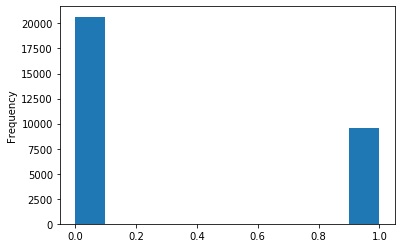

In [0]:
df['Target'].plot(kind='hist')

In [0]:
df_labels = df.drop_duplicates('patientId')
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26684 entries, 0 to 30225
Data columns (total 6 columns):
patientId    26684 non-null object
x            6012 non-null float64
y            6012 non-null float64
width        6012 non-null float64
height       6012 non-null float64
Target       26684 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [0]:
df_labels['Target'].value_counts()

0    20672
1     6012
Name: Target, dtype: int64

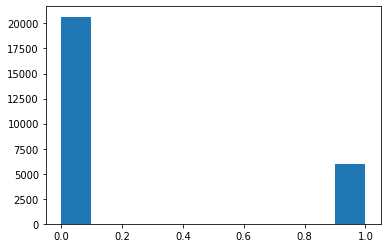

In [0]:
df_labels['Target'].hist(grid=0)

In [0]:
df_labels['Target'].value_counts(normalize='True')*100

0    77.469645
1    22.530355
Name: Target, dtype: float64

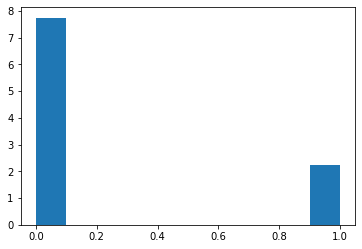

In [0]:
df_labels['Target'].hist(density='True',grid=0)

 ### Pneumonia : 6012 patients  No Pneumonia : 20672 patients

## Analysing Stage_2_detailed_class_info.csv

In [0]:

# Load detailed classes
detailed_class_df = pd.read_csv('/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_detailed_class_info.csv')
detailed_class_df.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [0]:
print(detailed_class_df.info())
print("-----Check for Nulls in Class Column------")
print(detailed_class_df['class'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
patientId    30227 non-null object
class        30227 non-null object
dtypes: object(2)
memory usage: 472.4+ KB
None
-----Check for Nulls in Class Column------
0


In [0]:
detailed_class_df_labels = detailed_class_df.drop_duplicates('patientId').reset_index()
detailed_class_df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 3 columns):
index        26684 non-null int64
patientId    26684 non-null object
class        26684 non-null object
dtypes: int64(1), object(2)
memory usage: 625.5+ KB


In [0]:
detailed_class_df_labels['class'].value_counts()

No Lung Opacity / Not Normal    11821
Normal                           8851
Lung Opacity                     6012
Name: class, dtype: int64

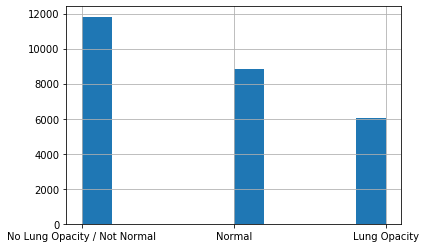

In [0]:
detailed_class_df_labels['class'].hist()

In [0]:
detailed_class_df_labels['class'].value_counts(normalize='True')

No Lung Opacity / Not Normal    0.443000
Normal                          0.331697
Lung Opacity                    0.225304
Name: class, dtype: float64

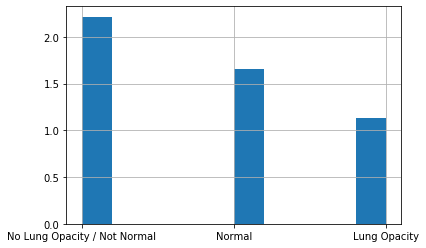

In [0]:
detailed_class_df_labels['class'].hist(density='True')

#### The bar chart says it clear that, although there are more patients without pneumonia (lung opacity), there are more patients in that distribution with something wrong with their lungs. This could be some other form of ailment or condition.

In [0]:
## Check the images from the image folder
import os
TRAIN_IMAGES = '/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_images'
Dataset = '/content/gdrive/My Drive/GL Capstone Project/Dataset/'

In [0]:
#patient_id = random.choice(df['patientId']) # pick a random patient_id
patient_id = '11d0e217-7779-4446-bf81-7529de124d89'
dcm_file_no_pneumonia = (TRAIN_IMAGES+"/"+patient_id+'.dcm')
#dcm_data_no_pneumonia = pydicom.read_file(dcm_file_no_pneumonia)
dcm_data_no_pneumonia = pydicom.filereader.dcmread(dcm_file_no_pneumonia)
print(dcm_data_no_pneumonia)
print('\n')
print('Shape of dicom train image: {}'.format(dcm_data_no_pneumonia.pixel_array.shape))

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4685.1517874309.111970
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '11d0e217-7779-4446-bf81-7529de124d89'
(0010, 0020) Patient ID                          LO: '11d0e217-7779-4446-bf81-7529de124d89'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

In [0]:
len(detailed_class_df_labels)

26684

The Metadata has Age and Gender which can be extracted for further analysis

In [0]:
for index, row in detailed_class_df_labels.iterrows():
#for i in range(20000,26684):
  print(i)
  patient_id = detailed_class_df_labels['patientId'][i]
  dcm_file_no_pneumonia = (TRAIN_IMAGES+"/"+patient_id+'.dcm')
  dcm_data_no_pneumonia = pydicom.filereader.dcmread(dcm_file_no_pneumonia, defer_size='512 KB',specific_tags=['PatientAge', 'PatientSex'],stop_before_pixels='True')
  Gender.append(dcm_data_no_pneumonia.PatientSex)
  Age.append(dcm_data_no_pneumonia.PatientAge)


In [0]:
Meta_Df = pd.read_csv(Dataset+"Meta_Batch.csv")

In [0]:
Meta_Df=Meta_Df.drop(columns='Unnamed: 0')

In [0]:
Meta_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 4 columns):
patientId    26684 non-null object
Age          26684 non-null int64
Gender       26684 non-null object
Target       26684 non-null int64
dtypes: int64(2), object(2)
memory usage: 834.0+ KB


In [0]:
Meta_Df.groupby('Gender')['Target'].value_counts(normalize='True')

Gender  Target
F       0         0.782775
        1         0.217225
M       0         0.768561
        1         0.231439
Name: Target, dtype: float64

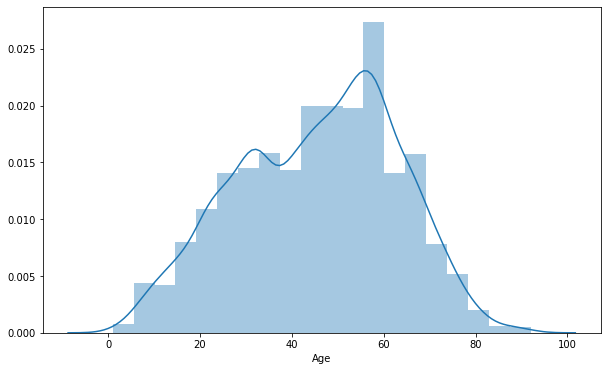

In [0]:
plt.figure(figsize=(10, 6))
sns.distplot(Meta_Df[Meta_Df['Target']==1]['Age'],bins=20)

(-0.5, 1023.5, 1023.5, -0.5)

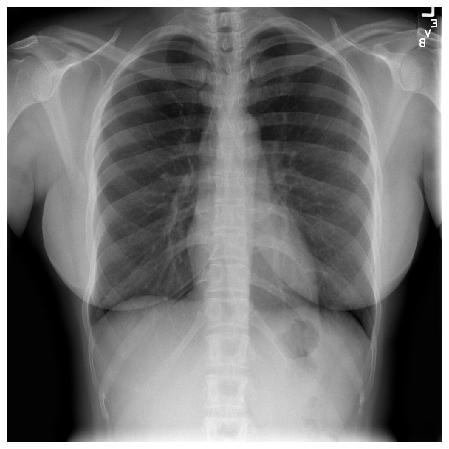

In [0]:
image = dcm_data_no_pneumonia.pixel_array
pylab.figure(figsize=(8, 8))
pylab.imshow(image, cmap=pylab.cm.gist_gray)
pylab.axis('off')

### The above image shows no sign of Pnuemonia, as defined in the train data 

In [0]:
#patient_id = random.choice(df['patientId']) # pick a random patient_id
patient_id = '00436515-870c-4b36-a041-de91049b9ab4'
dcm_file_pneumonia = (TRAIN_IMAGES+"/"+patient_id+'.dcm')
dcm_data_pneumonia = pydicom.read_file(dcm_file_pneumonia)
print(dcm_data_pneumonia)
print('\n')
print('Shape of dicom train image: {}'.format(dcm_data_pneumonia.pixel_array.shape))

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0020) Patient ID                          LO: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

(-0.5, 1023.5, 1023.5, -0.5)

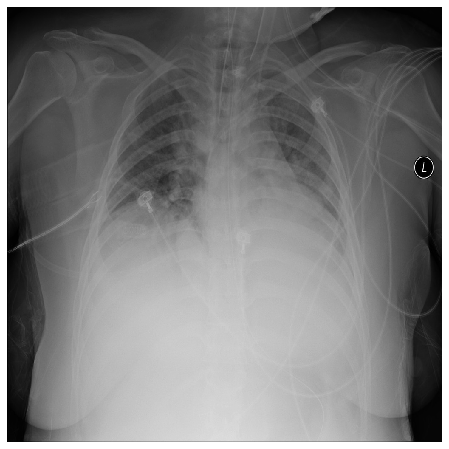

In [0]:
image1 = dcm_data_pneumonia.pixel_array
pylab.figure(figsize=(8, 8))
pylab.imshow(image1, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [0]:
df[df['patientId'] == '00436515-870c-4b36-a041-de91049b9ab4']

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


## Bounding Boxes

#### For a single patientID, we get two x and y values, and also, for a patient bounding boxs neednot be only one.
#### Hence group the bound boxes for each patientID

# New Section

In [0]:
def parse_data(df):
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]
    parsed = {}
    for n, row in df.iterrows():
        
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': '/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}
        
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

In [0]:
def draw_BB(data):
    
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array
    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)
    
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

In [0]:
###  For a patient with Pneumonia : patientId = '00436515-870c-4b36-a041-de91049b9ab4']

In [0]:
df[df['patientId']==patient_id]

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [0]:
grouped_BB_data = parse_data(df)
print(grouped_BB_data[patient_id])

{'dicom': '/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm', 'label': 1, 'boxes': [[152.0, 264.0, 379.0, 213.0], [152.0, 562.0, 453.0, 256.0]]}


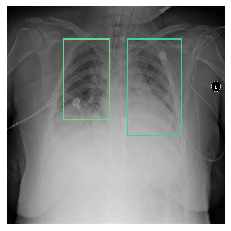

In [0]:
draw_BB(grouped_BB_data[patient_id])

In [0]:
#### patient with no Pneumonia patient_id = '00436515-870c-4b36-a041-de91049b9ab4'
print(grouped_BB_data['11d0e217-7779-4446-bf81-7529de124d89'])

{'dicom': '/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_images/11d0e217-7779-4446-bf81-7529de124d89.dcm', 'label': 0, 'boxes': []}


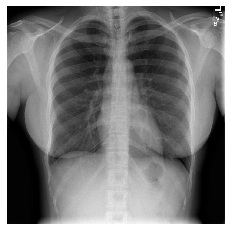

In [0]:
draw_BB(grouped_BB_data['11d0e217-7779-4446-bf81-7529de124d89'])

{'dicom': '/content/gdrive/My Drive/GL Capstone Project/Dataset/stage_2_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm', 'label': 0, 'boxes': []}


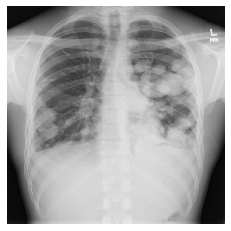

In [0]:
#### patient with no Pneumonia, but not normal. patient_id = '00436515-870c-4b36-a041-de91049b9ab4'
print(grouped_BB_data['00322d4d-1c29-4943-afc9-b6754be640eb'])
draw_BB(grouped_BB_data['00322d4d-1c29-4943-afc9-b6754be640eb'])